In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
!wget $data

--2023-09-27 00:10:30--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv.43'

     0K .......... .......... .......... .......... ..........  3% 2.43M 1s
    50K .......... .......... .......... .......... ..........  7% 9.61M 0s
   100K .......... .......... .......... .......... .......... 10% 4.07M 0s
   150K .......... .......... .......... .......... .......... 14% 10.9M 0s
   200K .......... .......... .......... .......... .......... 17% 5.01M 0s
   250K .......... .......... .......... .......... .......... 21% 20.8M 0s
   300K .......... .......... .......... .......... .......... 25% 13.5M 0s
   350K .......... ..........

In [4]:
df=pd.read_csv('housing.csv.3')

In [5]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
df1=df[(df['ocean_proximity']=='<1H OCEAN') | (df['ocean_proximity']=='INLAND')]
cols=['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
df1=df1[cols]

In [7]:
df1

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


# Question 1

In [8]:
df1.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2

In [9]:
df1['population'].median()

1195.0

In [10]:
n=len(df1)
n

15687

In [11]:
n_val=int(0.2*n)
n_test=int(0.2*n)
n_train=n-(n_val+n_test)

In [12]:
def dfgen(s, df_1):
    size=len(df_1)
    indx=np.arange(size)
    np.random.seed(s)
    np.random.shuffle(indx)
    
    df_train=df_1.iloc[indx[:n_train]]
    df_val=df_1.iloc[indx[n_train:n_train+n_val]]
    df_test=df_1.iloc[indx[n_train+n_val:]]
    
    return df_train, df_val, df_test

In [13]:
s=42
df1_train, df1_val, df1_test = dfgen(s, df1)

In [14]:
df1_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
20157,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080,297900.0
20005,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586,40900.0
6691,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546,500001.0
3470,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526,183300.0


In [15]:
df1_val

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9235,37.02,-120.09,9.0,1608.0,297.0,1057.0,295.0,3.7143,81600.0
11104,33.84,-117.88,34.0,1410.0,214.0,837.0,240.0,6.1168,213900.0
7428,33.95,-118.21,32.0,1116.0,328.0,1265.0,302.0,2.2950,155200.0
19928,36.32,-119.32,29.0,2409.0,436.0,1142.0,440.0,3.6895,87700.0
15534,33.14,-117.11,10.0,3208.0,636.0,1395.0,582.0,3.4455,190500.0
...,...,...,...,...,...,...,...,...,...
20033,36.07,-119.02,29.0,2610.0,597.0,1659.0,571.0,1.5911,60800.0
19766,40.03,-122.10,25.0,2516.0,NaN,1266.0,494.0,1.7566,58400.0
6970,34.00,-118.04,30.0,5308.0,854.0,2114.0,838.0,5.1985,279200.0
6790,34.10,-118.15,36.0,3514.0,818.0,2277.0,828.0,3.1211,229300.0


In [16]:
df1_test

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
11959,33.90,-117.44,23.0,4487.0,754.0,2609.0,778.0,4.2788,148700.0
1257,38.03,-121.65,28.0,3144.0,694.0,1095.0,482.0,3.4402,192400.0
18438,37.25,-121.85,20.0,3773.0,624.0,1965.0,607.0,5.4939,241200.0
15069,32.78,-116.97,35.0,1113.0,236.0,681.0,246.0,2.9784,136400.0
16227,37.97,-121.32,43.0,2453.0,490.0,1093.0,438.0,2.9107,88800.0
...,...,...,...,...,...,...,...,...,...
6651,34.15,-118.14,41.0,1256.0,407.0,855.0,383.0,1.9923,500001.0
17810,37.40,-121.86,19.0,4043.0,764.0,2196.0,708.0,6.1504,268400.0
6850,34.07,-118.15,52.0,1983.0,344.0,887.0,331.0,3.2875,234400.0
2161,36.78,-119.81,37.0,1965.0,364.0,796.0,335.0,3.6250,83400.0


In [17]:
base=['housing_median_age','total_rooms', 'total_bedrooms', 'population', 'median_income']

In [18]:
y_train=np.log1p(df1_train.median_house_value.values)
y_train

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

In [19]:
y_val=np.log1p(df1_val.median_house_value.values)

In [20]:
#X matrix with null values replaced by mean
def X_m(df_tr):
    dfx=df_tr.fillna(df.total_bedrooms.mean())
    
    X=dfx[base].values
    return X

In [21]:
#X matrix with null values replaced by zero
def X_z(df_tr):
    dfx=df_tr.fillna(0)

    X=dfx[base].values
    return X

In [22]:
#Linear regression training
def train_linreg(X,y):
    one_array=np.ones(X.shape[0])
    X=np.column_stack([one_array,X])
    
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [23]:
#Linear regression training with regularization
def train_linreg_reg(X,y,r):
    one_array=np.ones(X.shape[0])
    X=np.column_stack([one_array,X])
                
    XTX=X.T.dot(X)
    XTX=XTX + r*np.eye(XTX.shape[0])
        
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [24]:
#Root Mean Squared Error
def rmse(y, y_pred):
    error=y-y_pred
    se=error**2
    mse=se.mean()
    return np.sqrt(mse)

In [25]:
X_train_mean=X_m(df1_train)
X_train_zero=X_z(df1_train)

X_val_mean=X_m(df1_val)
X_val_zero=X_z(df1_val)

w0, w=train_linreg(X_train_mean,y_train)
w0_1, w_1=train_linreg(X_train_zero,y_train)

y_pred_mean=w0+X_val_mean.dot(w)
y_pred_zero=w0_1+X_val_zero.dot(w_1)

<Axes: ylabel='Count'>

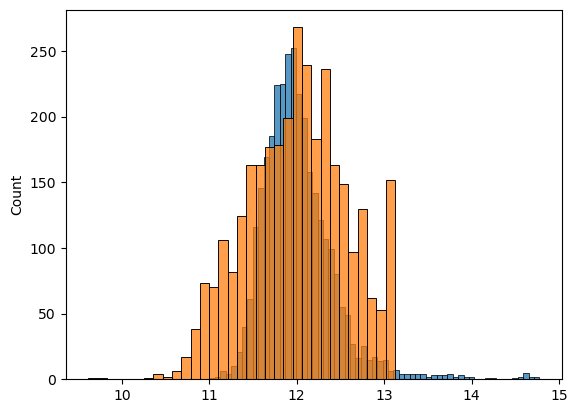

In [26]:
sns.histplot(y_pred_mean)
sns.histplot(y_val)

<Axes: ylabel='Count'>

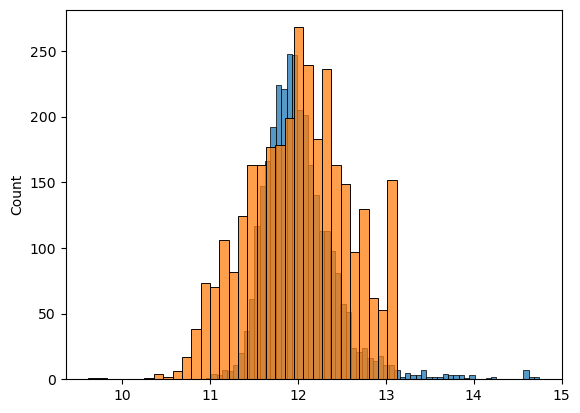

In [27]:
sns.histplot(y_pred_zero)
sns.histplot(y_val)

# Question 3

In [28]:
rmse_mean=rmse(y_val, y_pred_mean)
round(rmse_mean, 2)

0.4

In [29]:
rmse_zero=rmse(y_val, y_pred_zero)
round(rmse_zero,2)

0.4

# Question 4

In [30]:
r=[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

rmse_values=[]

for x in r:
    w0_reg, w_reg=train_linreg_reg(X_train_zero,y_train,x)
    y_pred_reg=w0_reg+X_val_zero.dot(w_reg)

    rmse_mean=rmse(y_val, y_pred_reg)
    rmse_values.append(rmse_mean)

In [31]:
print(rmse_values)

[0.40361079184846155, 0.4036107919235356, 0.40361079935682836, 0.4036108669591129, 0.4036115456593404, 0.403618600282477, 0.40371580149113584, 0.4047220339462193, 0.4072401590011564]


In [32]:
print("The r that gives the best RMSE: ", r[rmse_values.index(min(rmse_values))])

The r that gives the best RMSE:  0


# Question 5

In [33]:
s_list=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_s_values=[]

for s in s_list:
    df1s_train, df1s_val, df1s_test = dfgen(s, df1)
    
    y_train_s=np.log1p(df1s_train.median_house_value.values)
    y_val_s=np.log1p(df1s_val.median_house_value.values)
    
    X_train_s=X_z(df1s_train)
    X_val_s=X_z(df1s_val)
    
    w0_s, w_s=train_linreg(X_train_s,y_train_s)
    y_pred_s=w0_s+X_val_s.dot(w_s)

    rmse_mean=rmse(y_val_s, y_pred_s)
    rmse_s_values.append(rmse_mean)

In [34]:
print(rmse_s_values)

[0.39967433972331806, 0.39918509748916453, 0.40190171992749735, 0.39590395437876164, 0.4026567111416741, 0.39929749435770423, 0.39434242536764885, 0.3984555043734388, 0.41648250150049576, 0.39535355829809243]


In [35]:
stdev=np.std(rmse_s_values)

In [36]:
round(stdev, 3)

0.006

# Question 6

In [37]:
s0=9
r=0.001

dfs0_train, dfs0_val, dfs0_test = dfgen(s0, df1)
    
y_train_s0=np.log1p(dfs0_train.median_house_value.values)
y_val_s0=np.log1p(dfs0_val.median_house_value.values)
    
X_train_s0=X_z(dfs0_train)
X_val_s0=X_z(dfs0_val)

X_sum=np.concatenate([X_train_s0, X_val_s0])
y_sum=np.concatenate([y_train_s0, y_val_s0])

X_test=X_z(dfs0_test)
y_test=np.log1p(dfs0_test.median_house_value.values)

w0s, ws=train_linreg_reg(X_sum,y_sum,r)
y_pred_s0=w0s+X_test.dot(ws)

rmse_s0=rmse(y_test, y_pred_s0)

print(rmse_s0)

0.3962936680456163


<Axes: ylabel='Count'>

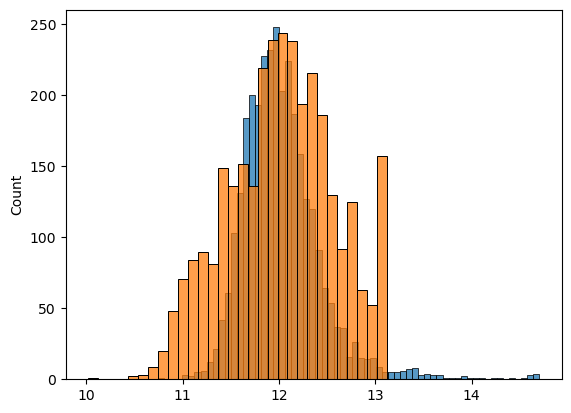

In [38]:
sns.histplot(y_pred_s0)
sns.histplot(y_test)